In [2]:
import pandas as pd

In [2]:
import yfinance as yf
import pandas as pd

def load_single_stock(symbol: str, start: str, end: str) -> pd.DataFrame:
    """
    특정 종목(symbol)의 주가 데이터를 불러오는 함수
    :param symbol: 티커(ex. 'AAPL', '005930.KS')
    :param start: 시작일자 (ex. '2024-01-01')
    :param end: 종료일자 (ex. '2025-01-01')
    :return: OHLCV 데이터프레임
    """
    df = yf.download(symbol, start=start, end=end)
    df = df.reset_index()  # 인덱스를 날짜 컬럼으로
    return df

# 사용 예시
df_apple = load_single_stock('AAPL', '2024-01-01', '2025-01-01')
print(df_apple.head())


C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\2638445126.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
0      2024-01-02  184.290436  187.070083  182.553158  185.789453  82488700
1      2024-01-03  182.910522  184.528677  182.096477  182.880742  58414500
2      2024-01-04  180.587555  181.758969  179.565044  180.825800  71983600
3      2024-01-05  179.862823  181.431339  178.860172  180.666948  62303300
4      2024-01-08  184.210999  184.250716  180.180517  180.766224  59144500


In [3]:
df = yf.download('TSLA', start='2020-01-01', end='2025-07-08')
df

C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\2349999091.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start='2020-01-01', end='2025-07-08')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...
2025-06-30,317.660004,325.579987,316.600006,319.899994,76695100
2025-07-01,300.709991,305.890015,293.209991,298.459991,145085700


In [5]:
df.reset_index()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...,...
1379,2025-06-30,317.660004,325.579987,316.600006,319.899994,76695100
1380,2025-07-01,300.709991,305.890015,293.209991,298.459991,145085700
1381,2025-07-02,315.649994,316.829987,303.820007,312.630005,119483700


In [76]:
import yfinance as yf
import pandas as pd
from tqdm import tqdm

def load_ticker_data(symbol: str, start: str, end: str) -> pd.DataFrame:
    """
    특정 종목(symbol)의 주가 데이터를 불러오는 함수
    :param symbol: 티커(ex. 'AAPL', '005930.KS')
    :param start: 시작일자 (ex. '2024-01-01')
    :param end: 종료일자 (ex. '2025-01-01')
    :return: OHLCV 데이터프레임
    """
    df = yf.download(symbol, start=start, end=end)
    df = df.reset_index()  # 인덱스를 날짜 컬럼으로
    return df

def load_tickers_data(symbols: list, start: str, end: str):
    """
    여러 종목의 주가 데이터를 딕셔너리 형태로 불러오는 함수
    :param symbols: 종목 티커 리스트 (ex. ['AAPL', 'MSFT', 'GOOG'])
    :param start: 시작일자
    :param end: 종료일자
    :return: {티커: 데이터프레임} 형태의 딕셔너리, 실패한 종목 리스트
    """

    data = {}
    fail_symbols = []

    for symbol in tqdm(symbols):
        try:
            df = yf.download(symbol, start=start, end=end)
            if not df.empty:
                data[symbol] = df.reset_index()
        except Exception as e:
            print(f"[{symbol}] 데이터 수집 실패: {e}")
            fail_symbols.append(symbol)

    return data, fail_symbols

def get_sp500_symbols():
    """
    S&P 500 지수에 포함된 종목의 티커를 가져오는 함수
    :return: S&P 500 종목 티커 리스트
    """
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    df = pd.read_html(url)[0]
    symbols = df['Symbol'].str.replace('.', '-', regex=False).tolist()
    return symbols

def get_nasdaq100_symbols():
    """
    NASDAQ-100 지수에 포함된 종목의 티커를 가져오는 함수
    :return: NASDAQ-100 종목 티커 리스트
    """
    url = 'https://en.wikipedia.org/wiki/NASDAQ-100'
    df = pd.read_html(url)[4]  # 실제 테이블 번호는 print로 먼저 확인
    symbols = df['Ticker'].str.replace('.', '-', regex=False).tolist()
    return symbols



In [11]:
df_list = load_tickers_data(['AAPL', 'MSFT', 'GOOG'], '2024-01-01', '2025-01-01')

C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\2835632439.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\2835632439.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\2835632439.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [23]:
def get_sp500_symbols():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    df = pd.read_html(url)[0]
    symbols = df['Symbol'].str.replace('.', '-', regex=False).tolist()
    return symbols

def get_nasdaq100_symbols():
    url = 'https://en.wikipedia.org/wiki/NASDAQ-100'
    df = pd.read_html(url)[4]  # 실제 테이블 번호는 print로 먼저 확인
    symbols = df['Ticker'].str.replace('.', '-', regex=False).tolist()
    return symbols

def load_market_data(symbols, start, end):
    data = {}
    for symbol in symbols:
        try:
            df = yf.download(symbol, start=start, end=end)
            if not df.empty:
                data[symbol] = df.reset_index()
        except Exception as e:
            print(f"[{symbol}] 오류: {e}")
    return data

In [74]:
sp500_symbols = get_sp500_symbols()
sp500_data = load_market_data(sp500_symbols, '2024-01-01', '2025-01-01')

C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\2808358788.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\2808358788.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\2808358788.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\2808358788.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[************

In [45]:
url = 'https://en.wikipedia.org/wiki/NASDAQ-100'
df = pd.read_html(url)[4]

In [46]:
df

,Ticker,Company,GICS Sector,GICS Sub-Industry
0,ADBE,Adobe Inc.,Information Technology,Application Software
1,AMD,Advanced Micro Devices,Information Technology,Semiconductors
2,ABNB,Airbnb,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,GOOGL,Alphabet Inc. (Class A),Communication Services,Interactive Media & Services
4,GOOG,Alphabet Inc. (Class C),Communication Services,Interactive Media & Services
...,...,...,...,...
96,VRTX,Vertex Pharmaceuticals,Health Care,Biotechnology
97,WBD,Warner Bros. Discovery,Communication Services,Broadcasting
98,WDAY,"Workday, Inc.",Information Technology,Application Software
99,XEL,Xcel Energy,Utilities,Multi-Utilities


In [47]:
df['Ticker'].str.replace('.', '-', regex=False)

0       ADBE
1        AMD
2       ABNB
3      GOOGL
4       GOOG
       ...  
96      VRTX
97       WBD
98      WDAY
99       XEL
100       ZS
Name: Ticker, Length: 101, dtype: object

In [49]:
for d in df['Ticker'].unique():
    if('.' in d):
        print(d)

In [65]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df = pd.read_html(url)

In [73]:
df[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
497,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [77]:
import yfinance as yf
import pandas as pd
from tqdm import tqdm

def load_ticker_data(symbol: str, start: str, end: str) -> pd.DataFrame:
    """
    특정 종목(symbol)의 주가 데이터를 불러오는 함수
    :param symbol: 티커(ex. 'AAPL', '005930.KS')
    :param start: 시작일자 (ex. '2024-01-01')
    :param end: 종료일자 (ex. '2025-01-01')
    :return: OHLCV 데이터프레임
    """
    df = yf.download(symbol, start=start, end=end)
    df = df.reset_index()  # 인덱스를 날짜 컬럼으로
    return df

def load_tickers_data(symbols: list, start: str, end: str):
    """
    여러 종목의 주가 데이터를 딕셔너리 형태로 불러오는 함수
    :param symbols: 종목 티커 리스트 (ex. ['AAPL', 'MSFT', 'GOOG'])
    :param start: 시작일자
    :param end: 종료일자
    :return: {티커: 데이터프레임} 형태의 딕셔너리, 실패한 종목 리스트
    """

    data = {}
    fail_symbols = []

    for symbol in tqdm(symbols):
        try:
            df = yf.download(symbol, start=start, end=end)
            if not df.empty:
                data[symbol] = df.reset_index()
        except Exception as e:
            print(f"[{symbol}] 데이터 수집 실패: {e}")
            fail_symbols.append(symbol)

    return data, fail_symbols

def get_sp500_symbols():
    """
    S&P 500 지수에 포함된 종목의 티커를 가져오는 함수
    :return: S&P 500 종목 티커 리스트
    """
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    df = pd.read_html(url)[0]
    symbols = df['Symbol'].str.replace('.', '-', regex=False).tolist()
    return symbols

def get_nasdaq100_symbols():
    """
    NASDAQ-100 지수에 포함된 종목의 티커를 가져오는 함수
    :return: NASDAQ-100 종목 티커 리스트
    """
    url = 'https://en.wikipedia.org/wiki/NASDAQ-100'
    df = pd.read_html(url)[4]  # 실제 테이블 번호는 print로 먼저 확인
    symbols = df['Ticker'].str.replace('.', '-', regex=False).tolist()
    return symbols



In [78]:
df = load_ticker_data('AAPL', '2024-01-01', '2025-01-01')

C:\Users\jinwo\AppData\Local\Temp\ipykernel_20784\3976132771.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [79]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700
1,2024-01-03,182.910507,184.528662,182.096461,182.880727,58414500
2,2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
3,2024-01-05,179.862839,181.431354,178.860187,180.666963,62303300
4,2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500
...,...,...,...,...,...,...
247,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
248,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
249,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300


In [83]:
def check_data_quality(df: pd.DataFrame, symbol: str):
    """
    종목 데이터프레임의 품질 점검 결과 출력
    :param df: OHLCV 데이터프레임 (Date 컬럼 포함)
    :param symbol: 종목 티커명
    """
    print(f"\n=== [{symbol}] 데이터 품질 점검 ===")
    # 1. 상장일(최초날짜), 상장폐지일(마지막날짜)
    if 'Date' in df.columns:
        start_date = df['Date'].min()
        end_date = df['Date'].max()
    else:
        df = df.reset_index()
        start_date = df['Date'].min()
        end_date = df['Date'].max()
    print(f"상장일(데이터 시작): {start_date}")
    print(f"상장폐지일(데이터 끝): {end_date}")

    # 2. 결측치 개수 (각 컬럼별)
    na_counts = df.isna().sum()
    na_exist = na_counts.any()
    print("\n결측치 존재 여부:", "있음" if na_exist else "없음")
    print("컬럼별 결측치 개수:")
    print(na_counts)

    # 3. 전체 결측치 행 개수
    na_rows = df.isna().any(axis=1).sum()
    print(f"\n결측치 포함 행 개수: {na_rows} / 전체 {len(df)}개 행")

In [84]:
check_data_quality(df, symbol='AAPL')


=== [AAPL] 데이터 품질 점검 ===
상장일(데이터 시작): 2024-01-02 00:00:00
상장폐지일(데이터 끝): 2024-12-31 00:00:00

결측치 존재 여부: 없음
컬럼별 결측치 개수:
Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

결측치 포함 행 개수: 0 / 전체 252개 행


In [3]:
import yfinance as yf
import pandas as pd
from tqdm import tqdm

def load_ticker_data(symbol: str, start: str, end: str) -> pd.DataFrame:
    """
    특정 종목(symbol)의 주가 데이터를 불러오는 함수
    :param symbol: 티커(ex. 'AAPL', '005930.KS')
    :param start: 시작일자 (ex. '2024-01-01')
    :param end: 종료일자 (ex. '2025-01-01')
    :return: OHLCV 데이터프레임
    """
    df = yf.download(symbol, start=start, end=end)
    df = df.reset_index()  # 인덱스를 날짜 컬럼으로
    return df


def load_tickers_data(symbols: list, start: str, end: str):
    """
    여러 종목의 주가 데이터를 딕셔너리 형태로 불러오는 함수
    :param symbols: 종목 티커 리스트 (ex. ['AAPL', 'MSFT', 'GOOG'])
    :param start: 시작일자
    :param end: 종료일자
    :return: {티커: 데이터프레임} 형태의 딕셔너리, 실패한 종목 리스트
    """

    data = {}
    fail_symbols = []

    for symbol in tqdm(symbols):
        try:
            df = yf.download(symbol, start=start, end=end)
            if not df.empty:
                data[symbol] = df.reset_index()
        except Exception as e:
            print(f"[{symbol}] 데이터 수집 실패: {e}")
            fail_symbols.append(symbol)

    return data, fail_symbols

def get_sp500_symbols():
    """
    S&P 500 지수에 포함된 종목의 티커를 가져오는 함수
    :return: S&P 500 종목 티커 리스트
    """
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    df = pd.read_html(url)[0]
    symbols = df['Symbol'].str.replace('.', '-', regex=False).tolist()
    return symbols

def get_nasdaq100_symbols():
    """
    NASDAQ-100 지수에 포함된 종목의 티커를 가져오는 함수
    :return: NASDAQ-100 종목 티커 리스트
    """
    url = 'https://en.wikipedia.org/wiki/NASDAQ-100'
    df = pd.read_html(url)[4]  # 실제 테이블 번호는 print로 먼저 확인
    symbols = df['Ticker'].str.replace('.', '-', regex=False).tolist()
    return symbols

def check_data_quality(df: pd.DataFrame, symbol: str):
    """
    종목 데이터프레임의 품질 점검 결과 출력
    :param df: OHLCV 데이터프레임 (Date 컬럼 포함)
    :param symbol: 종목 티커명
    """
    print(f"\n=== [{symbol}] 데이터 품질 점검 ===")
    # 1. 상장일(최초날짜), 상장폐지일(마지막날짜)
    if 'Date' in df.columns:
        start_date = df['Date'].min()
        end_date = df['Date'].max()
    else:
        df = df.reset_index()
        start_date = df['Date'].min()
        end_date = df['Date'].max()
    print(f"상장일(데이터 시작): {start_date}")
    print(f"상장폐지일(데이터 끝): {end_date}")

    # 2. 결측치 개수 (각 컬럼별)
    na_counts = df.isna().sum()
    na_exist = na_counts.any()
    print("\n결측치 존재 여부:", "있음" if na_exist else "없음")
    print("컬럼별 결측치 개수:")
    print(na_counts)

    # 3. 전체 결측치 행 개수
    na_rows = df.isna().any(axis=1).sum()
    print(f"\n결측치 포함 행 개수: {na_rows} / 전체 {len(df)}개 행")

In [4]:
df = load_ticker_data('TSLA', '2020-01-01', '2025-07-09')
df

C:\Users\jinwo\AppData\Local\Temp\ipykernel_4568\670482208.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...,...
1380,2025-07-01,300.709991,305.890015,293.209991,298.459991,145085700
1381,2025-07-02,315.649994,316.829987,303.820007,312.630005,119483700
1382,2025-07-03,315.350006,318.450012,312.760010,317.989990,58042300


In [5]:
check_data_quality(df, symbol='TSLA')


=== [TSLA] 데이터 품질 점검 ===
상장일(데이터 시작): 2020-01-02 00:00:00
상장폐지일(데이터 끝): 2025-07-08 00:00:00

결측치 존재 여부: 없음
컬럼별 결측치 개수:
Price   Ticker
Date              0
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64

결측치 포함 행 개수: 0 / 전체 1385개 행


In [9]:
def sample_strategy(data: pd.DataFrame, params: dict = None) -> pd.DataFrame:
    """
    이동평균선 골든크로스/데드크로스 전략 예시
    :param data: 주가 데이터
    :param params: {'short': 20, 'long': 60}
    :return: 매수/매도 신호가 추가된 데이터프레임
    """
    params = params or {'short': 20, 'long': 60}
    df = data.copy()

    df['ma_short'] = df['Close'].rolling(params['short']).mean()
    df['ma_long']  = df['Close'].rolling(params['long']).mean()
    df['signal'] = 0

    # 매수
    df.loc[df['ma_short'] > df['ma_long'], 'signal'] = 1
    # 매도
    df.loc[df['ma_short'] < df['ma_long'], 'signal'] = -1

    return df


In [11]:
sample_strategy(df, params={'short': 10, 'long': 30})

{'short': 10, 'long': 30}


Price,Date,Close,High,Low,Open,Volume,ma_short,ma_long,signal
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,,
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500,NaN,NaN,0
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500,NaN,NaN,0
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000,NaN,NaN,0
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500,NaN,NaN,0
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1380,2025-07-01,300.709991,305.890015,293.209991,298.459991,145085700,324.503998,330.137665,-1
1381,2025-07-02,315.649994,316.829987,303.820007,312.630005,119483700,324.433997,329.256331,-1
1382,2025-07-03,315.350006,318.450012,312.760010,317.989990,58042300,323.763998,328.307331,-1


In [ ]:
df['ma_short'] = df['Close'].rolling(params['short']).mean()
df['ma_long']  = df['Close'].rolling(params['long']).mean()
df['signal'] = 0

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,30.480133
...,...
1380,319.065997
1381,316.685999
1382,314.600000
1383,308.662000


In [17]:
import numpy as np

def sample_strategy(data: pd.DataFrame, params: dict = None) -> pd.DataFrame:
    """
    이동평균선 골든크로스/데드크로스 전략 예시
    :param data: 주가 데이터
    :param params: {'short': 20, 'long': 60}
    :return: 매수/매도 신호가 추가된 데이터프레임
    """
    params = params or {'short': 20, 'long': 60}
    df = data.copy()

    df['ma_short'] = df['Close'].rolling(params['short']).mean()
    df['ma_long']  = df['Close'].rolling(params['long']).mean()
    df['signal'] = 0

    df.loc[:, 'signal'] = np.where(df['ma_short'] >= df['ma_long'], 1, 0)

    return df


In [15]:
data = df.copy()
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [16]:
data['ma_short'] = data['Close'].rolling(20).mean()
data['ma_long'] = data['Close'].rolling(60).mean()
data.head()

Price,Date,Close,High,Low,Open,Volume,ma_short,ma_long
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500,NaN,NaN
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500,NaN,NaN
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000,NaN,NaN
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500,NaN,NaN
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500,NaN,NaN


In [19]:
data.loc[:, 'signal'] = np.where(data['ma_short'] >= data['ma_long'], 1, 0)

In [20]:
data.head()

Price,Date,Close,High,Low,Open,Volume,ma_short,ma_long,signal
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,,
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500,NaN,NaN,0
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500,NaN,NaN,0
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000,NaN,NaN,0
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500,NaN,NaN,0
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500,NaN,NaN,0


In [22]:
data

Price,Date,Close,High,Low,Open,Volume,ma_short,ma_long,signal
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,,
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500,NaN,NaN,0
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500,NaN,NaN,0
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000,NaN,NaN,0
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500,NaN,NaN,0
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1380,2025-07-01,300.709991,305.890015,293.209991,298.459991,145085700,321.792497,302.688500,1
1381,2025-07-02,315.649994,316.829987,303.820007,312.630005,119483700,320.361497,303.958834,1
1382,2025-07-03,315.350006,318.450012,312.760010,317.989990,58042300,319.526498,305.326500,1


<AxesSubplot:title={'center':'Market Positioning'}>

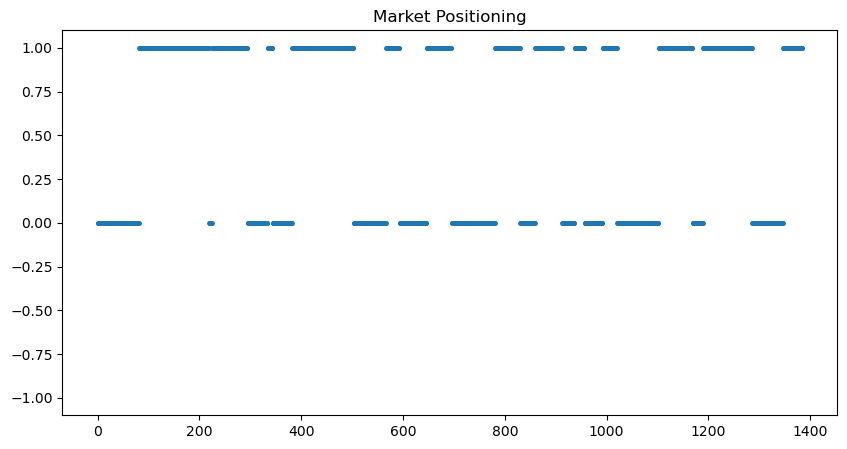

In [24]:
data['signal'].plot(
    ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 5), marker='.', markersize=5, linestyle="none"
)

In [25]:
data.shift()

Price,Date,Close,High,Low,Open,Volume,ma_short,ma_long,signal
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,,
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500.0,NaN,NaN,0.0
2,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500.0,NaN,NaN,0.0
3,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000.0,NaN,NaN,0.0
4,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
1380,2025-06-30,317.660004,325.579987,316.600006,319.899994,76695100.0,323.891498,302.131334,1.0
1381,2025-07-01,300.709991,305.890015,293.209991,298.459991,145085700.0,321.792497,302.688500,1.0
1382,2025-07-02,315.649994,316.829987,303.820007,312.630005,119483700.0,320.361497,303.958834,1.0


In [35]:
exit_index = data[(data['signal'] - data['signal'].shift()) == -1].index
long_index = data[(data['signal'] - data['signal'].shift()) == 1].index

In [37]:
data.iloc[exit_index, 'signal'] =

Price,Date,Close,High,Low,Open,Volume,ma_short,ma_long,signal
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,,
219,2020-11-12,137.253326,141.000000,136.506668,138.350006,59565300,139.754832,140.517799,0
295,2021-03-05,199.316666,209.279999,179.830002,208.686661,268189500,249.188334,251.008833,0
344,2021-05-14,196.580002,197.623337,190.153336,194.470001,100112700,225.225333,225.920722,0
503,2021-12-30,356.779999,365.183319,351.049988,353.776672,47040900,337.729999,338.892777,0
594,2022-05-11,244.666672,269.923340,242.399994,265.000000,97224600,305.999169,308.050889,0
696,2022-10-06,238.130005,244.580002,235.350006,239.440002,69298400,281.973000,282.538112,0
830,2023-04-20,162.990005,169.699997,160.559998,166.169998,210970800,187.792500,189.163833,0
913,2023-08-18,215.490005,217.580002,212.360001,214.119995,135813700,249.049501,249.939333,0
957,2023-10-20,211.990005,218.860001,210.419998,217.009995,137734000,249.395000,250.109666,0


In [38]:
import numpy as np

def sample_strategy(data: pd.DataFrame, params: dict = None) -> pd.DataFrame:
    """
    이동평균선 골든크로스/데드크로스 전략 예시
    :param data: 주가 데이터
    :param params: {'short': 20, 'long': 60}
    :return: 매수/매도 신호가 추가된 데이터프레임
    """
    params = params or {'short': 20, 'long': 60}
    df = data.copy()

    df['ma_short'] = df['Close'].rolling(params['short']).mean()
    df['ma_long']  = df['Close'].rolling(params['long']).mean()
    df['signal'] = 0

    df.loc[:, 'signal'] = np.where(df['ma_short'] >= df['ma_long'], 1, 0)

    return df


In [42]:
data = sample_strategy(df)

In [51]:
def get_short_long_index(data: pd.DataFrame) -> dict:
    """
    매수/매도 인덱스  추출 함수
    :param data: 매수/매도 신호가 포함된 주가 데이터프레임
    :return: 매수/매도 신호가 포함된 딕셔너리
    """

    result = {
        'exit_index': [],
        'long_index': []
    }

    if( 'signal' not in data.columns):
        raise ValueError("데이터에 'signal' 컬럼이 없습니다.")

    exit_index = data[(data['signal'] - data['signal'].shift()) == -1].index
    long_index = data[(data['signal'] - data['signal'].shift()) == 1].index

    result['exit_index'] = exit_index
    result['long_index'] = long_index

    return result

In [52]:
get_short_long_index(data)

{'exit_index': Index([219, 295, 344, 503, 594, 696, 830, 913, 957, 1021, 1169, 1286], dtype='int64'),
 'long_index': Index([82, 225, 334, 382, 567, 647, 781, 860, 937, 992, 1102, 1190, 1347], dtype='int64')}